In [1]:
import pandas as pd
import numpy as np
import os
import json

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df_train = pd.read_csv("/content/drive/MyDrive/T4_DATASET/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/T4_DATASET/test.csv")

In [3]:
df_train.head(10)

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,91832,USA,Chicago,Apartment,Fully-Furnished,3327.0,1667700.0,1994.0,1.0,NaN,...,38655.0,NaN,20.0,12320.0,392881.0,0.25,2.0,1.0,1.0,0
1,107645,Germany,Frankfurt,Townhouse,Fully-Furnished,4952.0,1487080.0,NaN,1.0,2.0,...,98460.0,NaN,NaN,NaN,761722.0,0.05,3.0,NaN,10.0,0
2,157078,NaN,NaN,NaN,NaN,5752.0,2189190.0,2015.0,1.0,NaN,...,49160.0,1413671.0,15.0,2850.0,775519.0,0.25,1.0,NaN,7.0,0
3,166173,Japan,Kyoto,Studio,Semi-Furnished,5125.0,NaN,2006.0,6.0,7.0,...,NaN,NaN,20.0,6765.0,NaN,0.89,NaN,NaN,NaN,0
4,68553,China,NaN,NaN,Fully-Furnished,5233.0,1989192.0,1978.0,4.0,2.0,...,25435.0,1020076.0,25.0,4640.0,969116.0,NaN,NaN,NaN,NaN,0
5,118421,Germany,Berlin,Townhouse,Fully-Furnished,4034.0,1209788.0,1998.0,5.0,NaN,...,15600.0,877204.0,25.0,4170.0,332584.0,NaN,3.0,3.0,6.0,0
6,85602,Singapore,Singapore,NaN,Fully-Furnished,NaN,847127.0,NaN,3.0,7.0,...,NaN,545312.0,20.0,2995.0,NaN,NaN,1.0,2.0,1.0,0
7,152769,Singapore,Singapore,Townhouse,Unfurnished,1169.0,816345.0,NaN,1.0,4.0,...,79515.0,602380.0,30.0,NaN,213965.0,0.05,7.0,1.0,8.0,0
8,131278,Brazil,Rio de Janeiro,Apartment,Fully-Furnished,3366.0,670102.0,2023.0,NaN,1.0,...,NaN,501924.0,10.0,3430.0,168178.0,0.45,NaN,6.0,2.0,0
9,166595,NaN,Liverpool,Apartment,Unfurnished,4485.0,1795178.0,1971.0,2.0,NaN,...,NaN,1107742.0,10.0,5290.0,687436.0,0.40,4.0,1.0,10.0,0


In [4]:
df_test.head(10)

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,legal_cases_on_property,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score
0,169120,Brazil,São Paulo,Townhouse,Fully-Furnished,3933,782165,1971,2,3,...,0,33284,359919,20,17190,422246,0.08,6,1,7
1,33833,South Africa,Cape Town,Townhouse,Semi-Furnished,940,169278,1964,0,7,...,0,22620,102588,10,3775,66690,0.05,2,3,1
2,117949,India,Chennai,Townhouse,Fully-Furnished,4884,735855,1984,1,6,...,0,13465,517315,30,2750,218540,0.24,4,2,6
3,78860,Brazil,São Paulo,Studio,Unfurnished,2864,573510,2004,3,8,...,0,19446,475569,30,6310,97941,0.15,9,3,6
4,159687,UK,London,Townhouse,Fully-Furnished,727,290114,1993,1,4,...,0,35410,147008,25,17235,143106,0.03,3,1,3
5,151427,UAE,Dubai,Farmhouse,Unfurnished,3628,2173581,2007,3,2,...,0,58270,1600594,20,15975,572987,0.20,4,1,10
6,99136,Germany,Frankfurt,Studio,Unfurnished,4898,1465110,1981,1,7,...,0,16850,747488,25,18895,717622,0.30,4,3,4
7,196884,USA,New York,Independent House,Fully-Furnished,4772,2385983,2009,2,2,...,0,84520,1360333,10,18435,1025650,0.18,1,7,7
8,112675,Australia,Sydney,Villa,Fully-Furnished,2228,717902,1976,0,6,...,0,80310,508355,30,7945,209547,0.04,10,8,10
9,21387,Australia,Brisbane,Independent House,Semi-Furnished,1798,570387,1960,4,6,...,0,47430,319581,30,12820,250806,0.04,9,6,1


In [5]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (6,4)

REPORT_DIR = "/content/eda_reports"
os.makedirs(REPORT_DIR, exist_ok=True)

RANDOM_STATE = 43
RARE_THRESH = 0.01      # <1% = rare category
MAX_BINS    = 40
TOP_K_CATS  = 30
CMAP        = "viridis"

def save_df(df: pd.DataFrame, name: str):
    path = os.path.join(REPORT_DIR, f"{name}.csv")
    df.to_csv(path, index=False)
    return path

def save_fig(name: str):
    path = os.path.join(REPORT_DIR, f"{name}.png")
    plt.tight_layout()
    plt.savefig(path, dpi=140, bbox_inches="tight")
    plt.close()
    return path

def infer_target(df: pd.DataFrame):
    # Heuristik cari target (umum di tugas klasifikasi)
    candidates = ["decision", "target", "label", "y"]
    for c in candidates:
        for col in df.columns:
            if col.lower() == c:
                return col
    # fallback: kolom biner 0/1
    for col in df.columns:
        s = df[col]
        if pd.api.types.is_integer_dtype(s) or pd.api.types.is_bool_dtype(s):
            uniq = s.dropna().unique()
            if len(uniq) <= 2 and set(uniq).issubset({0,1}):
                return col
    return None

def iqr_bounds(s: pd.Series):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    return lower, upper, iqr

In [6]:
print("Train shape:", df_train.shape)
print("Test  shape:", df_test.shape)

profile = {
    "train_shape": df_train.shape,
    "test_shape": df_test.shape,
    "train_columns": df_train.columns.tolist(),
    "test_columns": df_test.columns.tolist(),
    "head_train": df_train.head(3).to_dict(orient="list")
}
with open(os.path.join(REPORT_DIR, "00_profile.json"), "w") as f:
    json.dump(profile, f, indent=2)

Train shape: (140000, 25)
Test  shape: (60000, 24)


In [7]:
# Info ringkas
print(df_train.info())

dtypes = df_train.dtypes.astype(str).reset_index()
dtypes.columns = ["column", "dtype"]
save_df(dtypes, "01_train_dtypes")

desc_num = df_train.select_dtypes(include=np.number).describe().T.reset_index().rename(columns={"index":"feature"})
desc_cat = df_train.select_dtypes(include=["object","category","bool"]).describe().T.reset_index().rename(columns={"index":"feature"})
save_df(desc_num, "02_describe_numeric")
save_df(desc_cat, "02_describe_categorical")
desc_num.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140000 entries, 0 to 139999
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   property_id              140000 non-null  int64  
 1   country                  111860 non-null  object 
 2   city                     111720 non-null  object 
 3   property_type            111580 non-null  object 
 4   furnishing_status        111440 non-null  object 
 5   property_size_sqft       111300 non-null  float64
 6   price                    111160 non-null  float64
 7   constructed_year         111020 non-null  float64
 8   previous_owners          110880 non-null  float64
 9   rooms                    110740 non-null  float64
 10  bathrooms                110600 non-null  float64
 11  garage                   110460 non-null  float64
 12  garden                   110320 non-null  float64
 13  crime_cases_reported     110180 non-null  float64
 14  lega

,feature,count,mean,std,min,25%,50%,75%,max
0,property_id,140000.0,1.000455e+05,57745.803181,1.0,49969.75,100078.5,150126.25,199999.0
1,property_size_sqft,111300.0,3.190909e+03,1614.142762,400.0,1792.00,3182.0,4583.00,6000.0
2,price,111160.0,1.215153e+06,823485.699271,56288.0,566768.25,1023207.0,1726431.00,4202151.0
3,constructed_year,111020.0,1.991459e+03,18.490322,1960.0,1975.00,1991.0,2008.00,2023.0
4,previous_owners,110880.0,3.007197e+00,2.000231,0.0,1.00,3.0,5.00,6.0
5,rooms,110740.0,4.511685e+00,2.295163,1.0,3.00,5.0,7.00,8.0
6,bathrooms,110600.0,2.758825e+00,1.840503,1.0,1.00,2.0,4.00,8.0
7,garage,110460.0,5.013580e-01,0.500000,0.0,0.00,1.0,1.00,1.0
8,garden,110320.0,4.994380e-01,0.500002,0.0,0.00,0.0,1.00,1.0
9,crime_cases_reported,110180.0,1.228463e+00,1.184092,0.0,0.00,1.0,2.00,9.0


In [8]:
# Missing
missing = df_train.isna().sum().sort_values(ascending=False).rename("missing_count").to_frame()
missing["missing_pct"] = (missing["missing_count"] / len(df_train)).round(4)
save_df(missing.reset_index().rename(columns={"index":"column"}), "03_missing_summary")
missing.head(10)

,missing_count,missing_pct
connectivity_score,31220,0.223
neighbourhood_rating,31080,0.222
satisfaction_score,30940,0.221
emi_to_income_ratio,30800,0.220
down_payment,30660,0.219
monthly_expenses,30520,0.218
loan_tenure_years,30380,0.217
loan_amount,30240,0.216
customer_salary,30100,0.215
legal_cases_on_property,29960,0.214


In [9]:
# Duplikat
duplicates_count = int(df_train.duplicated().sum())
print("Duplicate rows in train:", duplicates_count)
with open(os.path.join(REPORT_DIR, "04_duplicates.txt"), "w") as f:
    f.write(f"{duplicates_count}\n")

Duplicate rows in train: 0


In [10]:
# Low variance (konstan)
low_var_cols = df_train.columns[df_train.nunique(dropna=False) <= 1].tolist()
print("Low-variance columns:", low_var_cols if low_var_cols else "None")
with open(os.path.join(REPORT_DIR, "05_low_variance_columns.txt"), "w") as f:
    f.write("\n".join(low_var_cols) if low_var_cols else "None\n")

Low-variance columns: None


In [11]:
target_col = infer_target(df_train)
print("Target column guess:", target_col)

with open(os.path.join(REPORT_DIR, "06_target_guess.txt"), "w") as f:
    f.write(str(target_col))

if target_col is not None:
    target_counts = df_train[target_col].value_counts(dropna=False)
    target_pct = (target_counts / len(df_train)).round(4)
    target_df = pd.DataFrame({"value": target_counts.index, "count": target_counts.values, "pct": target_pct.values})
    save_df(target_df, "07_target_distribution")

    plt.figure()
    sns.countplot(x=target_col, data=df_train)
    plt.title(f"Target distribution: {target_col}")
    save_fig("07_target_distribution_plot")
else:
    print("Peringatan: Target tidak ditemukan otomatis. Pastikan nama kolom target sesuai.")

Target column guess: decision


In [12]:
num_cols = df_train.select_dtypes(include=np.number).columns.tolist()
print("Jumlah fitur numerik:", len(num_cols))

for col in num_cols:
    plt.figure()
    bins = min(MAX_BINS, max(10, int(np.sqrt(df_train[col].dropna().shape[0]))))
    sns.histplot(df_train[col], bins=bins, kde=True)
    plt.title(f"Histogram: {col}")
    save_fig(f"08_hist_{col}")

Jumlah fitur numerik: 21


In [13]:
if len(num_cols) > 1:
    corr = df_train[num_cols].corr(numeric_only=True)
    save_df(corr.reset_index().rename(columns={"index":"feature"}), "09_corr_numeric")

    # Heatmap
    # Batasi ukuran untuk banyak fitur
    size = min(18, 0.9*len(num_cols) if len(num_cols)>1 else 6)
    plt.figure(figsize=(size, size))
    sns.heatmap(corr, cmap=CMAP, square=True, cbar=True)
    plt.title("Correlation Heatmap (numeric)")
    save_fig("09_corr_heatmap")

    # Korelasi ke target (jika target numerik/biner)
    if target_col in num_cols:
        target_corr = corr[target_col].sort_values(ascending=False).to_frame().rename(columns={target_col:"corr_to_target"})
        save_df(target_corr.reset_index().rename(columns={"index":"feature"}), "09_corr_to_target")

In [14]:
out_rows = []
for col in num_cols:
    s = df_train[col].dropna()
    if s.empty:
        continue
    lower, upper, iqr = iqr_bounds(s)
    mask = (s < lower) | (s > upper)
    out_rate = float(mask.mean())
    out_rows.append([col, float(s.min()), float(s.max()), float(lower), float(upper), float(iqr), round(out_rate,4)])

    # Boxplot
    plt.figure(figsize=(7,3))
    sns.boxplot(x=s, orient="h")
    plt.title(f"Boxplot: {col} (outlier rate~{out_rate:.3f})")
    save_fig(f"10_box_{col}")

outlier_df = pd.DataFrame(out_rows, columns=["feature","min","max","lower_bound","upper_bound","iqr","outlier_rate"])
save_df(outlier_df, "10_outlier_iqr_summary")
outlier_df.sort_values("outlier_rate", ascending=False).head(10)


,feature,min,max,lower_bound,upper_bound,iqr,outlier_rate
20,decision,0.0,1.00,0.000,0.000,0.00,0.2309
16,emi_to_income_ratio,0.0,3.38,-0.185,0.495,0.17,0.0779
15,down_payment,9996.0,2464940.00,-474102.250,1284843.750,439736.50,0.0361
12,loan_amount,23504.0,3520150.00,-746115.500,2140282.500,721599.50,0.0249
2,price,56288.0,4202151.00,-1172725.875,3465925.125,1159662.75,0.0169
9,crime_cases_reported,0.0,9.00,-3.000,5.000,2.00,0.0036
3,constructed_year,1960.0,2023.00,1925.500,2057.500,33.00,0.0000
1,property_size_sqft,400.0,6000.00,-2394.500,8769.500,2791.00,0.0000
0,property_id,1.0,199999.00,-100265.000,300361.000,100156.50,0.0000
4,previous_owners,0.0,6.00,-5.000,11.000,4.00,0.0000


In [15]:
cat_cols = df_train.select_dtypes(include=["object","category","bool"]).columns.tolist()
print("Jumlah fitur kategorikal:", len(cat_cols))

rare_report = []
for col in cat_cols:
    vc = df_train[col].value_counts(dropna=False)
    pct = (vc / len(df_train)).round(4)
    cat_tbl = pd.DataFrame({"category": vc.index.astype(str), "count": vc.values, "pct": pct.values})
    save_df(cat_tbl, f"11_cats_{col}")

    # rare flag
    rare_list = cat_tbl.loc[cat_tbl["pct"] < RARE_THRESH, "category"].tolist()
    rare_report.append([col, len(rare_list), ", ".join(rare_list[:20])])

    # Plot top-K kategori
    plt.figure(figsize=(8,4))
    top_k = vc.head(TOP_K_CATS)
    sns.barplot(x=top_k.values, y=[str(x) for x in top_k.index], orient="h")
    plt.title(f"Top-{TOP_K_CATS} categories: {col}")
    plt.xlabel("count")
    save_fig(f"11_cats_top_{col}")

rare_df = pd.DataFrame(rare_report, columns=["feature","n_rare","sample_rare_values"])
save_df(rare_df, "11_rare_categories_summary")
rare_df.head(10)


Jumlah fitur kategorikal: 4


,feature,n_rare,sample_rare_values
0,country,0,
1,city,1,Chennai
2,property_type,0,
3,furnishing_status,0,


In [16]:
# Cek existensi kolom
train_cols = set(df_train.columns)
test_cols  = set(df_test.columns)
missing_in_test  = sorted(list(train_cols - test_cols))
extra_in_test    = sorted(list(test_cols - train_cols))

print("Kolom di train tapi tidak ada di test:", missing_in_test)
print("Kolom di test tapi tidak ada di train:", extra_in_test)

# Bandingkan dtypes numerik/kategorikal (nama yang sama)
both = sorted(list(train_cols & test_cols))
dtype_cmp = []
for c in both:
    dtype_cmp.append([c, str(df_train[c].dtype), str(df_test[c].dtype)])
dtype_cmp_df = pd.DataFrame(dtype_cmp, columns=["column","train_dtype","test_dtype"])
save_df(dtype_cmp_df, "12_dtype_compare_train_test")

# Perbandingan level kategori (ringkasan cepat, top-N)
cat_common = [c for c in cat_cols if c in df_test.columns]
cat_level_cmp_rows = []
for c in cat_common:
    tr_levels = df_train[c].astype(str).value_counts().index[:TOP_K_CATS].tolist()
    te_levels = df_test[c].astype(str).value_counts().index[:TOP_K_CATS].tolist()
    cat_level_cmp_rows.append([c, len(tr_levels), len(te_levels)])
cat_level_cmp = pd.DataFrame(cat_level_cmp_rows, columns=["feature","train_topK_levels","test_topK_levels"])
save_df(cat_level_cmp, "12_cat_levels_compare_topK")
cat_level_cmp.head(10)


Kolom di train tapi tidak ada di test: ['decision']
Kolom di test tapi tidak ada di train: []


,feature,train_topK_levels,test_topK_levels
0,country,14,13
1,city,30,30
2,property_type,7,6
3,furnishing_status,4,3


In [17]:
summary = {
    "train_shape": df_train.shape,
    "test_shape": df_test.shape,
    "n_numeric": len(num_cols),
    "n_categorical": len(cat_cols),
    "duplicates_train": duplicates_count,
    "low_variance_columns": low_var_cols,
    "target_col_guess": target_col,
    "reports_dir": REPORT_DIR
}
with open(os.path.join(REPORT_DIR, "99_summary.json"), "w") as f:
    json.dump(summary, f, indent=2)

print(json.dumps(summary, indent=2))

{
  "train_shape": [
    140000,
    25
  ],
  "test_shape": [
    60000,
    24
  ],
  "n_numeric": 21,
  "n_categorical": 4,
  "duplicates_train": 0,
  "low_variance_columns": [],
  "target_col_guess": "decision",
  "reports_dir": "/content/eda_reports"
}


# **PREPROCESSING**

In [18]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [19]:
RANDOM_STATE = 43

df_train = pd.read_csv("/content/drive/MyDrive/T4_DATASET/train.csv")
df_test  = pd.read_csv("/content/drive/MyDrive/T4_DATASET/test.csv")
sub_ex   = pd.read_csv("/content/drive/MyDrive/T4_DATASET/submission_example.csv")

TARGET = "decision"          # dari 06_target_guess.txt
ID_COL = "property_id"       # id-like kolom (dipakai untuk submission)

# Pastikan kolom target ada di train
assert TARGET in df_train.columns, f"Kolom target '{TARGET}' tidak ditemukan di train.csv"
assert ID_COL in df_train.columns and ID_COL in df_test.columns, "Kolom ID tidak konsisten di train/test"

In [20]:
# Pisahkan fitur dan target
y = df_train[TARGET].copy()

# Deteksi tipe
num_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_train.select_dtypes(include=["object","category","bool"]).columns.tolist()

# Buang kolom ID & target dari daftar fitur
if TARGET in num_cols: num_cols.remove(TARGET)
if TARGET in cat_cols: cat_cols.remove(TARGET)
for c in [ID_COL]:
    if c in num_cols: num_cols.remove(c)
    if c in cat_cols: cat_cols.remove(c)

print("Numerik:", len(num_cols), num_cols[:12], "...")
print("Kategorikal:", len(cat_cols), cat_cols)


Numerik: 19 ['property_size_sqft', 'price', 'constructed_year', 'previous_owners', 'rooms', 'bathrooms', 'garage', 'garden', 'crime_cases_reported', 'legal_cases_on_property', 'customer_salary', 'loan_amount'] ...
Kategorikal: 4 ['country', 'city', 'property_type', 'furnishing_status']


In [21]:
numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_cols),
        ("cat", categorical_pipeline, cat_cols),
    ],
    remainder="drop"
)

In [22]:
# Fitur mentah (drop ID & target)
X_raw = df_train.drop(columns=[TARGET, ID_COL])

# Split
X_train_raw, X_val_raw, y_train, y_val = train_test_split(
    X_raw, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

# Fit preprocessor pada TRAIN lalu transform ke TRAIN & VAL
X_train = preprocessor.fit_transform(X_train_raw)
X_val   = preprocessor.transform(X_val_raw)

print("X_train shape:", X_train.shape)
print("X_val   shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val   shape:", y_val.shape)

# Untuk kompatibilitas dengan snippet evaluasi-mu (yang menyebut y_test):
X_test = X_val
y_test = y_val


X_train shape: (112000, 81)
X_val   shape: (28000, 81)
y_train shape: (112000,)
y_val   shape: (28000,)


In [23]:
# Simpan ID untuk submission
test_ids = df_test[ID_COL].copy()

# Pastikan kolom fitur di test selaras dgn train (drop ID, dan pakai kolom yg sama urutan)
X_test_infer_raw = df_test.drop(columns=[ID_COL], errors="ignore")

# Transform dengan preprocessor yang SUDAH DIFIT dari TRAIN
X_test_infer = preprocessor.transform(X_test_infer_raw)
print("X_test_infer shape:", X_test_infer.shape)

# # Opsional: simpan objek2 penting ke disk (kalau mau dipakai di sel lain)
# import joblib
# joblib.dump(preprocessor, "/content/preprocessor.joblib")
# np.save("/content/X_train.npy", X_train)
# np.save("/content/X_val.npy", X_val)
# np.save("/content/y_train.npy", y_train.to_numpy())
# np.save("/content/y_val.npy", y_val.to_numpy())
# print("Artifacts saved: preprocessor.joblib, X_*.npy, y_*.npy")


X_test_infer shape: (60000, 81)


              precision    recall  f1-score   support

           0       0.90      0.95      0.93     21534
           1       0.80      0.66      0.72      6466

    accuracy                           0.88     28000
   macro avg       0.85      0.81      0.83     28000
weighted avg       0.88      0.88      0.88     28000



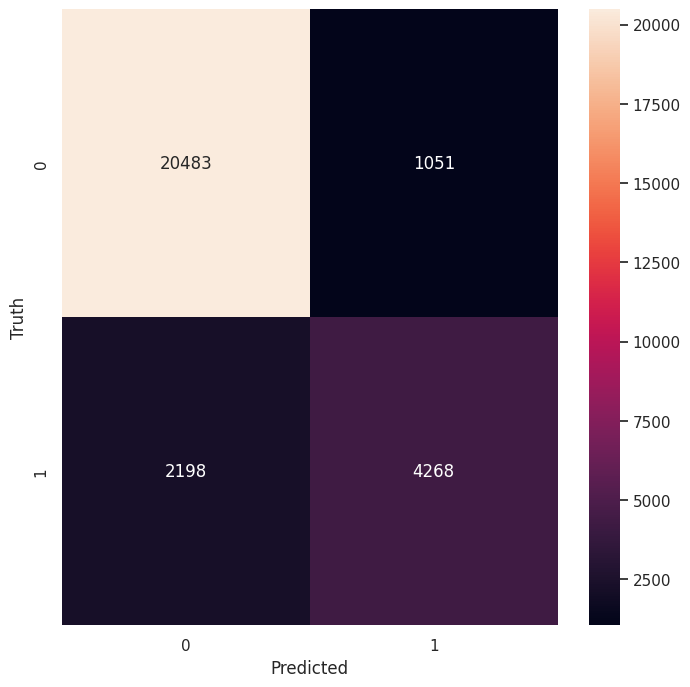

In [24]:
# Pastikan sudah memiliki variable
## X_train, X_val, y_train, y_val -> df_train
classifier = LogisticRegression()

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_pred=y_pred, y_true=y_test))

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [25]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import RandomOverSampler

# ===== Path (Colab) =====
TRAIN_PATH = "/content/drive/MyDrive/T4_DATASET/train.csv"
TEST_PATH  = "/content/drive/MyDrive/T4_DATASET/test.csv"
SUB_EXAMPLE_PATH = "/content/drive/MyDrive/T4_DATASET/submission_example.csv"  # opsional, kalau mau cek nama kolom

# ===== Konfigurasi =====
TARGET_COL   = "decision"
ID_COL       = "property_id"
RANDOM_STATE = 43
TEST_SIZE    = 0.2
RARE_THRESH  = 0.01  # <1% di TRAIN dianggap rare

# ===== Load =====
df_train = pd.read_csv(TRAIN_PATH)
df_test  = pd.read_csv(TEST_PATH)

# Simpan df_test untuk id submission (biar simpel dengan kode kamu)
df_test_scaled = df_test.copy()   # hanya supaya baris id = df_test_scaled["property_id"] di snippet-mu tetap jalan

# ===== Pisahkan target & drop kolom ID dari fitur =====
y = df_train[TARGET_COL].astype(int)
X = df_train.drop(columns=[TARGET_COL])
if ID_COL in X.columns:
    X = X.drop(columns=[ID_COL])

# ===== Feature Engineering ringan (tanpa leakage) =====
def add_features(df):
    df = df.copy()
    # Hanya tambah jika kolomnya tersedia:
    if {"price","property_size_sqft"}.issubset(df.columns):
        df["price_per_sqft"] = df["price"] / (df["property_size_sqft"].replace(0, np.nan))
    if "constructed_year" in df.columns:
        df["age"] = 2025 - df["constructed_year"]   # tahun sekarang: 2025
    if {"rooms","bathrooms"}.issubset(df.columns):
        df["rooms_per_bath"] = df["rooms"] / (df["bathrooms"].replace(0, np.nan))
    if "previous_owners" in df.columns:
        df["ever_owned_before"] = (df["previous_owners"].fillna(0) > 0).astype(int)
    # Hindari inf / NaN hasil pembagian
    for c in ["price_per_sqft", "rooms_per_bath"]:
        if c in df.columns:
            df[c] = df[c].replace([np.inf, -np.inf], np.nan)
    return df

X = add_features(X)
X_test_raw = df_test.drop(columns=[ID_COL]) if ID_COL in df_test.columns else df_test.copy()
X_test_raw = add_features(X_test_raw)

# ===== Tipe fitur =====
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=["object","category","bool"]).columns.tolist()

# ===== Rare-category compress berdasar TRAIN =====
def build_rare_maps(df, cat_cols, thresh=0.02):
    maps = {}
    n = len(df)
    for c in cat_cols:
        freq = df[c].astype(str).value_counts(dropna=False) / n
        rare_vals = set(freq[freq < thresh].index)
        if len(rare_vals) > 0:
            maps[c] = rare_vals
    return maps

def apply_rare_maps(df, maps):
    df = df.copy()
    for c, rare_vals in maps.items():
        s = df[c].astype(str)
        df[c] = np.where(s.isin({str(v) for v in rare_vals}), "Rare", s)
    return df

rare_maps = build_rare_maps(X, cat_cols, RARE_THRESH)
X = apply_rare_maps(X, rare_maps)
X_test_raw = apply_rare_maps(X_test_raw, rare_maps)

# ===== Split =====
X_train_df, X_val_df, y_train, y_val = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

# ===== ColumnTransformer: impute -> PowerTransform -> Scale (num) ; impute -> OHE (cat) =====
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("power",   PowerTransformer(method="yeo-johnson")),  # menangani skew tanpa syarat positif
    ("scaler",  StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ],
    remainder="drop"
)

# ===== Fit pada TRAIN, transform semua =====
preprocess.fit(X_train_df)
X_train_tr = preprocess.transform(X_train_df)
X_val_tr   = preprocess.transform(X_val_df)

# ===== Resampling untuk menyeimbangkan kelas pada TRAIN (tidak menyentuh VAL/TEST) =====
ros = RandomOverSampler(random_state=RANDOM_STATE)
X_train, y_train = ros.fit_resample(X_train_tr, y_train)

# ===== Siapkan TEST untuk evaluasi internal (VAL) & submission (TEST asli) =====
X_test = X_val_tr           # untuk evaluasi internal: blok evaluasi kamu pakai ini
y_test = y_val

# Selaraskan kolom test mentah terhadap train_df sebelum transform (jika ada selisih kolom awal)
for c in X_train_df.columns:
    if c not in X_test_raw.columns:
        X_test_raw[c] = np.nan
X_test_raw = X_test_raw[X_train_df.columns]
X_test_final = preprocess.transform(X_test_raw)  # untuk submission asli

print("✅ Preprocessing v2 selesai (dengan resampling & power transform)")
print("Shapes:")
print("  X_train:", X_train.shape, "| y_train:", y_train.shape, "(balanced by oversampling)")
print("  X_val  :", X_val_tr.shape, "| y_val  :", y_val.shape)
print("  X_test (VAL for eval):", X_test.shape, "| y_test:", y_test.shape)
print("  X_test_final (TEST for submission):", X_test_final.shape)

✅ Preprocessing v2 selesai (dengan resampling & power transform)
Shapes:
  X_train: (172268, 89) | y_train: (172268,) (balanced by oversampling)
  X_val  : (28000, 89) | y_val  : (28000,)
  X_test (VAL for eval): (28000, 89) | y_test: (28000,)
  X_test_final (TEST for submission): (60000, 89)


              precision    recall  f1-score   support

           0       0.95      0.84      0.89     21534
           1       0.62      0.86      0.72      6466

    accuracy                           0.84     28000
   macro avg       0.78      0.85      0.81     28000
weighted avg       0.88      0.84      0.85     28000



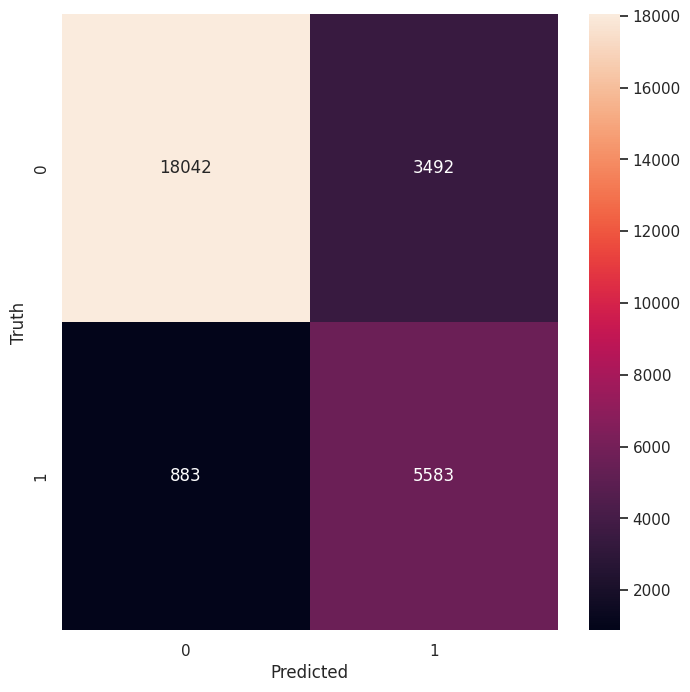

In [26]:
classifier = LogisticRegression()  # biarkan default sesuai instruksi
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_pred=y_pred, y_true=y_test))

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [27]:
from imblearn.over_sampling import RandomOverSampler  # bisa ganti SMOTE kalau mau


In [28]:
# ===== Load =====
df_train = pd.read_csv(TRAIN_PATH)
df_test  = pd.read_csv(TEST_PATH)

# Simpan untuk submission (biar barismu tetap: id = df_test_scaled["property_id"])
df_test_scaled = df_test.copy()

# ===== Target & base features =====
y = df_train[TARGET_COL].astype(int)
X = df_train.drop(columns=[TARGET_COL])
if ID_COL in X.columns:
    X = X.drop(columns=[ID_COL])

# ===== Feature Engineering ringan (tanpa leakage) =====
def add_features(df):
    df = df.copy()
    # Hanya tambah jika kolomnya tersedia:
    if {"price","property_size_sqft"}.issubset(df.columns):
        df["price_per_sqft"] = df["price"] / (df["property_size_sqft"].replace(0, np.nan))
    if "constructed_year" in df.columns:
        df["age"] = 2025 - df["constructed_year"]   # tahun sekarang: 2025
    if {"rooms","bathrooms"}.issubset(df.columns):
        df["rooms_per_bath"] = df["rooms"] / (df["bathrooms"].replace(0, np.nan))
    if "previous_owners" in df.columns:
        df["ever_owned_before"] = (df["previous_owners"].fillna(0) > 0).astype(int)
    # Hindari inf / NaN hasil pembagian
    for c in ["price_per_sqft", "rooms_per_bath"]:
        if c in df.columns:
            df[c] = df[c].replace([np.inf, -np.inf], np.nan)
    return df

X = add_features(X)
X_test_raw = df_test.drop(columns=[ID_COL]) if ID_COL in df_test.columns else df_test.copy()
X_test_raw = add_features(X_test_raw)

# ===== Tipe fitur =====
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=["object","category","bool"]).columns.tolist()

# ===== Rare-category compress berdasar TRAIN =====
def build_rare_maps(df, cat_cols, thresh=0.02):
    maps = {}
    n = len(df)
    for c in cat_cols:
        freq = df[c].astype(str).value_counts(dropna=False) / n
        rare_vals = set(freq[freq < thresh].index)
        if len(rare_vals) > 0:
            maps[c] = rare_vals
    return maps

def apply_rare_maps(df, maps):
    df = df.copy()
    for c, rare_vals in maps.items():
        s = df[c].astype(str)
        df[c] = np.where(s.isin({str(v) for v in rare_vals}), "Rare", s)
    return df

rare_maps = build_rare_maps(X, cat_cols, RARE_THRESH)
X = apply_rare_maps(X, rare_maps)
X_test_raw = apply_rare_maps(X_test_raw, rare_maps)

# ===== Split =====
X_train_df, X_val_df, y_train, y_val = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

# ===== ColumnTransformer: impute -> PowerTransform -> Scale (num) ; impute -> OHE (cat) =====
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("power",   PowerTransformer(method="yeo-johnson")),  # menangani skew tanpa syarat positif
    ("scaler",  StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ],
    remainder="drop"
)

# ===== Fit pada TRAIN, transform semua =====
preprocess.fit(X_train_df)
X_train_tr = preprocess.transform(X_train_df)
X_val_tr   = preprocess.transform(X_val_df)

# ===== Resampling untuk menyeimbangkan kelas pada TRAIN (tidak menyentuh VAL/TEST) =====
ros = RandomOverSampler(random_state=RANDOM_STATE)
X_train, y_train = ros.fit_resample(X_train_tr, y_train)

# ===== Siapkan TEST untuk evaluasi internal (VAL) & submission (TEST asli) =====
X_test = X_val_tr           # untuk evaluasi internal: blok evaluasi kamu pakai ini
y_test = y_val

# Selaraskan kolom test mentah terhadap train_df sebelum transform (jika ada selisih kolom awal)
for c in X_train_df.columns:
    if c not in X_test_raw.columns:
        X_test_raw[c] = np.nan
X_test_raw = X_test_raw[X_train_df.columns]
X_test_final = preprocess.transform(X_test_raw)  # untuk submission asli

print("✅ Preprocessing v2 selesai (dengan resampling & power transform)")
print("Shapes:")
print("  X_train:", X_train.shape, "| y_train:", y_train.shape, "(balanced by oversampling)")
print("  X_val  :", X_val_tr.shape, "| y_val  :", y_val.shape)
print("  X_test (VAL for eval):", X_test.shape, "| y_test:", y_test.shape)
print("  X_test_final (TEST for submission):", X_test_final.shape)

✅ Preprocessing v2 selesai (dengan resampling & power transform)
Shapes:
  X_train: (172268, 89) | y_train: (172268,) (balanced by oversampling)
  X_val  : (28000, 89) | y_val  : (28000,)
  X_test (VAL for eval): (28000, 89) | y_test: (28000,)
  X_test_final (TEST for submission): (60000, 89)


              precision    recall  f1-score   support

           0       0.95      0.84      0.89     21534
           1       0.62      0.86      0.72      6466

    accuracy                           0.84     28000
   macro avg       0.78      0.85      0.81     28000
weighted avg       0.88      0.84      0.85     28000



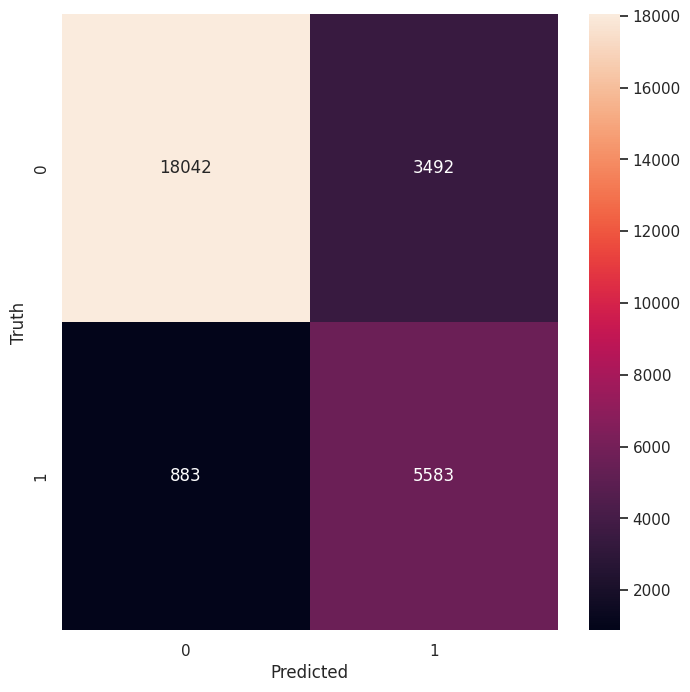

In [29]:
# Pastikan sudah memiliki variable
## X_train, X_val, y_train, y_val -> df_train
classifier = LogisticRegression()

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_pred=y_pred, y_true=y_test))

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [30]:
# Prepare submission
# First, ensure we have the property_id saved separately
# Assuming in preprocessing, we dropped it, so reload or save it before dropping
# For this, let's assume we need to adjust: load df_test again if needed, or save ids
import pandas as pd

# If property_id was dropped, reload df_test to get ids
# Use the already loaded df_test instead of reloading from file
property_ids = df_test[ID_COL] # Use ID_COL from configuration

# Now, use the prepared X_test_final as X_test for prediction
X_test_for_prediction = X_test_final # Use the correctly named variable

# Predict
y_pred = classifier.predict(X_test_for_prediction)

# Create submission DataFrame
submission_df = pd.DataFrame({'property_id': property_ids, 'decision': y_pred})
submission_df.to_csv('submission.csv', index=False)

print("Submission file created: submission.csv")
print(submission_df.head())

Submission file created: submission.csv
   property_id  decision
0       169120         0
1        33833         0
2       117949         0
3        78860         1
4       159687         0


In [31]:
!pip install -q kaggle
from google.colab import files

files.upload()
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [32]:
!kaggle competitions submit -c if-preprocessing-data-challenge -f submission.csv -m "Initial submission with Logistic Regression and SMOTE"

100% 495k/495k [00:00<00:00, 2.62MB/s]
Successfully submitted to [IF] Preprocessing Data Challenge